In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 30: Properties of Estimators

Now that we have seen two different ways to obtain parameter estimates, we will now look into ways to evaluate estimators. What makes an estimator a good estimator? We have briefly discussed bias, but we'll also discuss consistency. 

### Bias

(Review from Lesson 28). If we use an iid random sample to obtain an estimate of some parameter $\theta$, this estimate ($\hat{\theta}$) is a random variable. Each time I collect a new sample, I will get a different $\hat{\theta}$. Ideally, the distribution of this $\hat{\theta}$ should have an average (expected value) of $\theta$. 

If $E(\hat{\theta})=\theta$, then $\hat{\theta}$ is said to be unbiased. 

### Example 1: Uniform Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the continuous uniform distribution on the domain $0 \leq X \leq b$ with unknown parameter $b$. From lessons 28, we found that the method of moments estimate of $b$ is $2\bar{X}$. 

Is this estimate biased? Particularly, find $E(2\bar{X})$. 


$$ 
Goal : E(2\bar {X}) = ? = b
$$

$$
2*E(\bar {X}) = 2*E[(X1+X2+...Xn)/n]
$$

$$
(2/n) \sum E(Xi) = (2/n) (b/2) = b
$$


Therefore, the estimate is not biased.

### Example 2: Exponential Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the exponential distribution with unknown parameter $\lambda$. From lessons 28 and 29, we found that the method of moments and maximum likelihood estimates are both $\frac{1}{\bar{X}}$. 

Is this estimate biased? For this exercise, assume $\lambda=5$ and the size of each sample is 20. You will probably find it easier to do this via simulation (use `scipy` to generate a random sample from the exponential distribution with your choice of $\lambda$. Use this sample to obtain the estimate. Repeat this process many times to get a distribution $\hat{\lambda}$.) 

$$
\lambda = 5
$$
$$
size = 20
$$



In [4]:
# This is the estimator:
1/np.mean(stats.expon.rvs(scale = 1/5,size= 20))

5.885389526324778

In [5]:
# Now let's replicate this many times over:
lamest = [1/np.mean(stats.expon.rvs(scale = 1/5,size= 20)) for _ in np.arange(10000)]
np.mean(lamest)

# This is biased because we get 5.2, instead of 5.

5.2671018421641795

In [6]:
# Now let's replicate this many times over with a larger size:
lamest = [1/np.mean(stats.expon.rvs(scale = 1/5,size= 100)) for _ in np.arange(10000)]
np.mean(lamest)

# This is still biased because we get 5.05, instead of 5.

5.048208792736537

We just found that:
$$
E(1/\bar{X})\space is \space not \space equal \space to \space \lambda
$$

In fact:
$$
E(1/\bar {X}) = ((n+1)/(n)) * \lambda
$$

As we increase the size, our estimate gets closer and closer to the actual lambda.

## Consistency

An estimator is considered consistent if for any $\epsilon >0$, 

$$
\underset{n \to \infty}{\lim} P(|\hat{\theta}_n -\theta|<\epsilon)=1
$$

This is just a fancy way of saying that as $n$ increases, the estimator tends to get closer to $\theta$. 

### Lemma

An estimator is consistent if it is unbiased and if $\underset{n \to \infty}{\lim} Var(\hat{\theta}_n)=0$. In other words, an unbiased estimator is consistent if its variance goes to zero as sample size goes to infinity. 

### Example 3: Uniform Distribution

In Example 1, we showed that the method of moments estimator for $b$ is unbiased. Is it also consistent? What is the variance of this estimator? What happens to this variance as $n$ increases? 

$$
V(X) = \frac{(b-a-1)(b-a+1)}{12}
$$

$$
Var(2\bar{X})
$$
$$
= 4* Var (\bar {X})
$$

$$
= 4* Var ((X1+X2+...+Xn)/n))
$$

$$
= (4/n^2)* \sum Var (Xi)
$$

$$
Var(Xi) = (b^2/12)
$$

$$
= (4/n^2)* \sum (b^2/12) = (1/3) (b^2/n^2) = (b^2)/(3n)
$$

When we take the limit, to infinity... it goes to 0. So, it is consistent.

### Example 4: Normal Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the normal distribution with unknown mean and standard deviation. The method of moments (and maximum likelihood) estimator of $\mu$ is simply $\bar{X}$. We have already established that this estimate is unbiased. Is it consistent? 

$$
Var(\bar{X}) = Var(\frac{\sum{X_{i}}}{n}) = \frac{1}{n^2}\sum{Var(X_{i})} = \frac{1}{n^2}\sum{\sigma^2}
$$

$$
Var(\bar{X}) = \frac{n\sigma^2}{n^2} = \frac{\sigma^2}{n}
$$


As n approaches infinity, $Var(\bar{X})$ approaches 0. Thus, $\hat{\mu}$ is consistent.


## Weak Law of Large Numbers

It turns out that for all distributions, the sample mean is a consistent estimator for the population mean. This is known as the Weak Law of Large Numbers. 

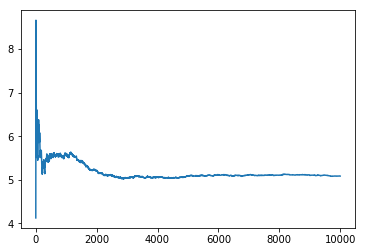

In [10]:
ns=np.arange(1,10001)
samp=stats.norm.rvs(5,6,size=10000)
sampmeans=np.cumsum(samp)/ns
plt.plot(ns,sampmeans)
plt.show()